In [23]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
%matplotlib inline

In [34]:
#load Dataset
path= r'C:\Users\anika\New York Airbnb\Data\Prepared Data'
df= pd.read_csv(os.path.join(path, 'ab_ny_cleaned.csv'))

In [35]:
df.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365
3,3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [26]:
#dropping index, id, last review
df= df.drop(columns=["ID", "index", "date", "Unnamed:0"], inplace=True, errors='ignore')

In [38]:
# dropping index, id, last review
df.drop(columns=["id", "last_review", "Unnamed: 0"], inplace=True, errors='ignore')
df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [39]:
#Creating a heatmap
numeric_df = df.select_dtypes(include='number')
numeric_df.head()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,40.64749,-73.97237,149,1,9,0.21,6,365
1,2845,40.75362,-73.98377,225,1,45,0.38,2,355
2,4632,40.80902,-73.94190,150,3,0,0.00,1,365
3,4869,40.68514,-73.95976,89,1,270,4.64,1,194
4,7192,40.79851,-73.94399,80,10,9,0.10,1,0


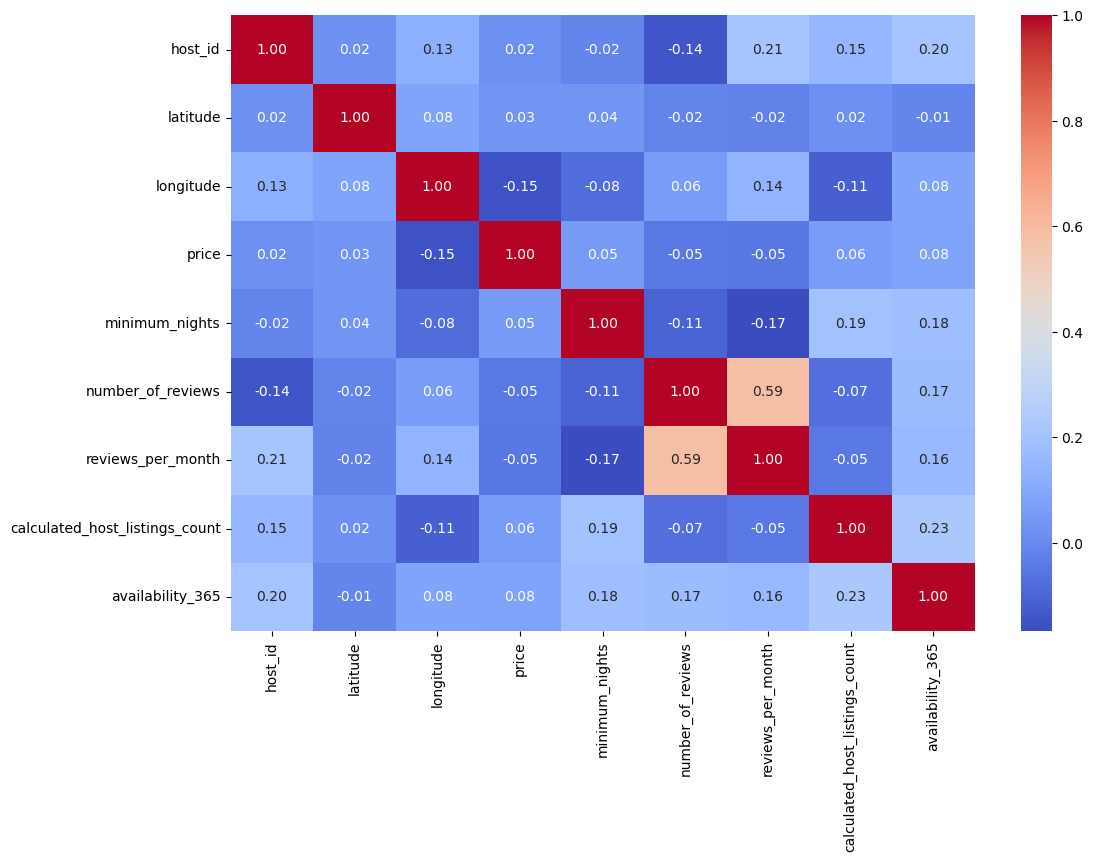

In [59]:
plt.figure(figsize=(12,8))
heat_map = sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [41]:
## Positive correlation
#host_id vs. latitude (correlation 1.00) to explore their perfect positive relationship.
#longitude vs. price (correlation 1.00) to investigate their strong positive association.
#minimum_nights vs. reviews_per_month (correlation 1.00) to examine their perfect positive correlation.
#number_of_reviews and reviews_per_month: Strong positive correlation (0.59)
#calculated_host_listings_count and availability_365: Weak positive correlation (0.23)
## Negative Correlation
#Longitude and price: -0.15, a weak negative relationship.
#price and reviews_per_month: -0.17, a weak negative association.
#calculated_host_listings_count and price: -0.11, indicating a slight negative correlation

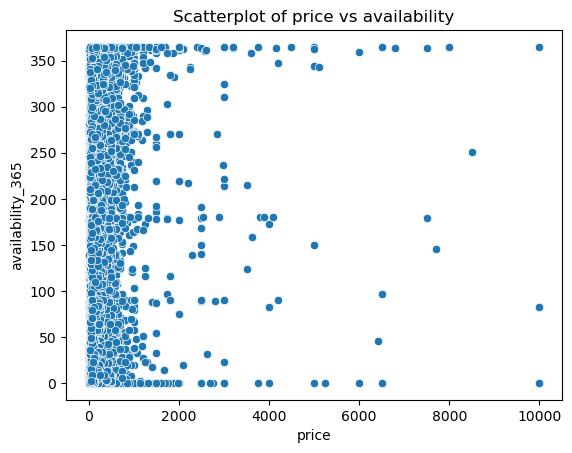

In [63]:
sns.scatterplot(data=df, x="price", y="availability_365")  
Price_vs_availability = plt.title("Scatterplot of price vs availability")
plt.show()

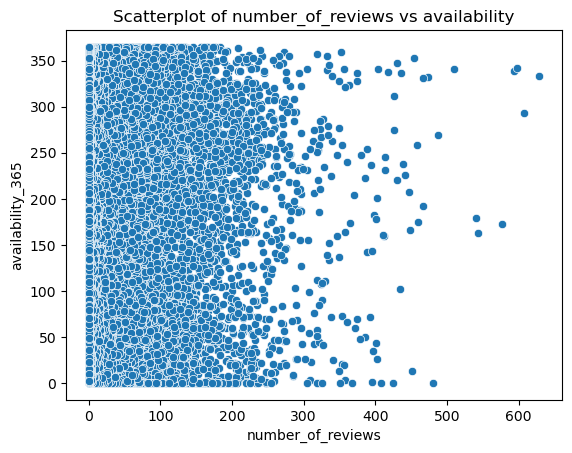

In [62]:
sns.scatterplot(data=df, x="number_of_reviews", y="availability_365")  
Number_of_reviews_vs_availability = plt.title("Scatterplot of number_of_reviews vs availability")
plt.show()

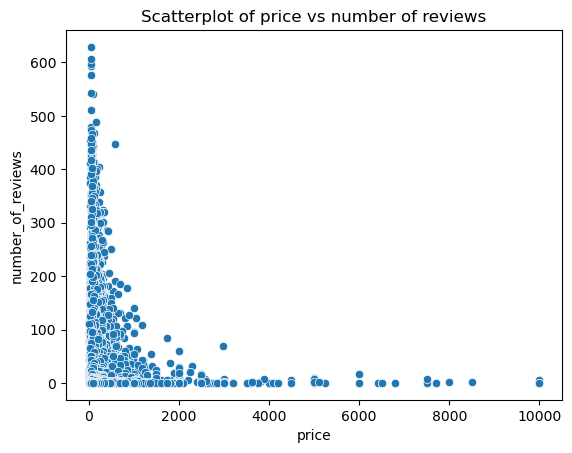

In [64]:
sns.scatterplot(data=df, x="price", y="number_of_reviews")  
price_vs_number_of_reviews = plt.title("Scatterplot of price vs number of reviews")
plt.show()

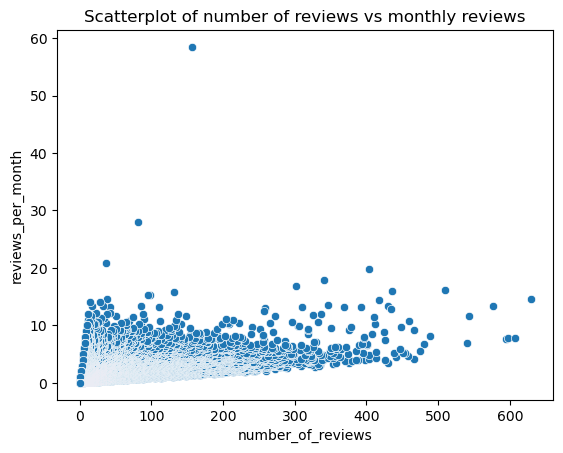

In [65]:
sns.scatterplot(data=df, x="number_of_reviews", y="reviews_per_month")  
number_of_reviews_vs_monthly_reviews = plt.title("Scatterplot of number of reviews vs monthly reviews")
plt.show()

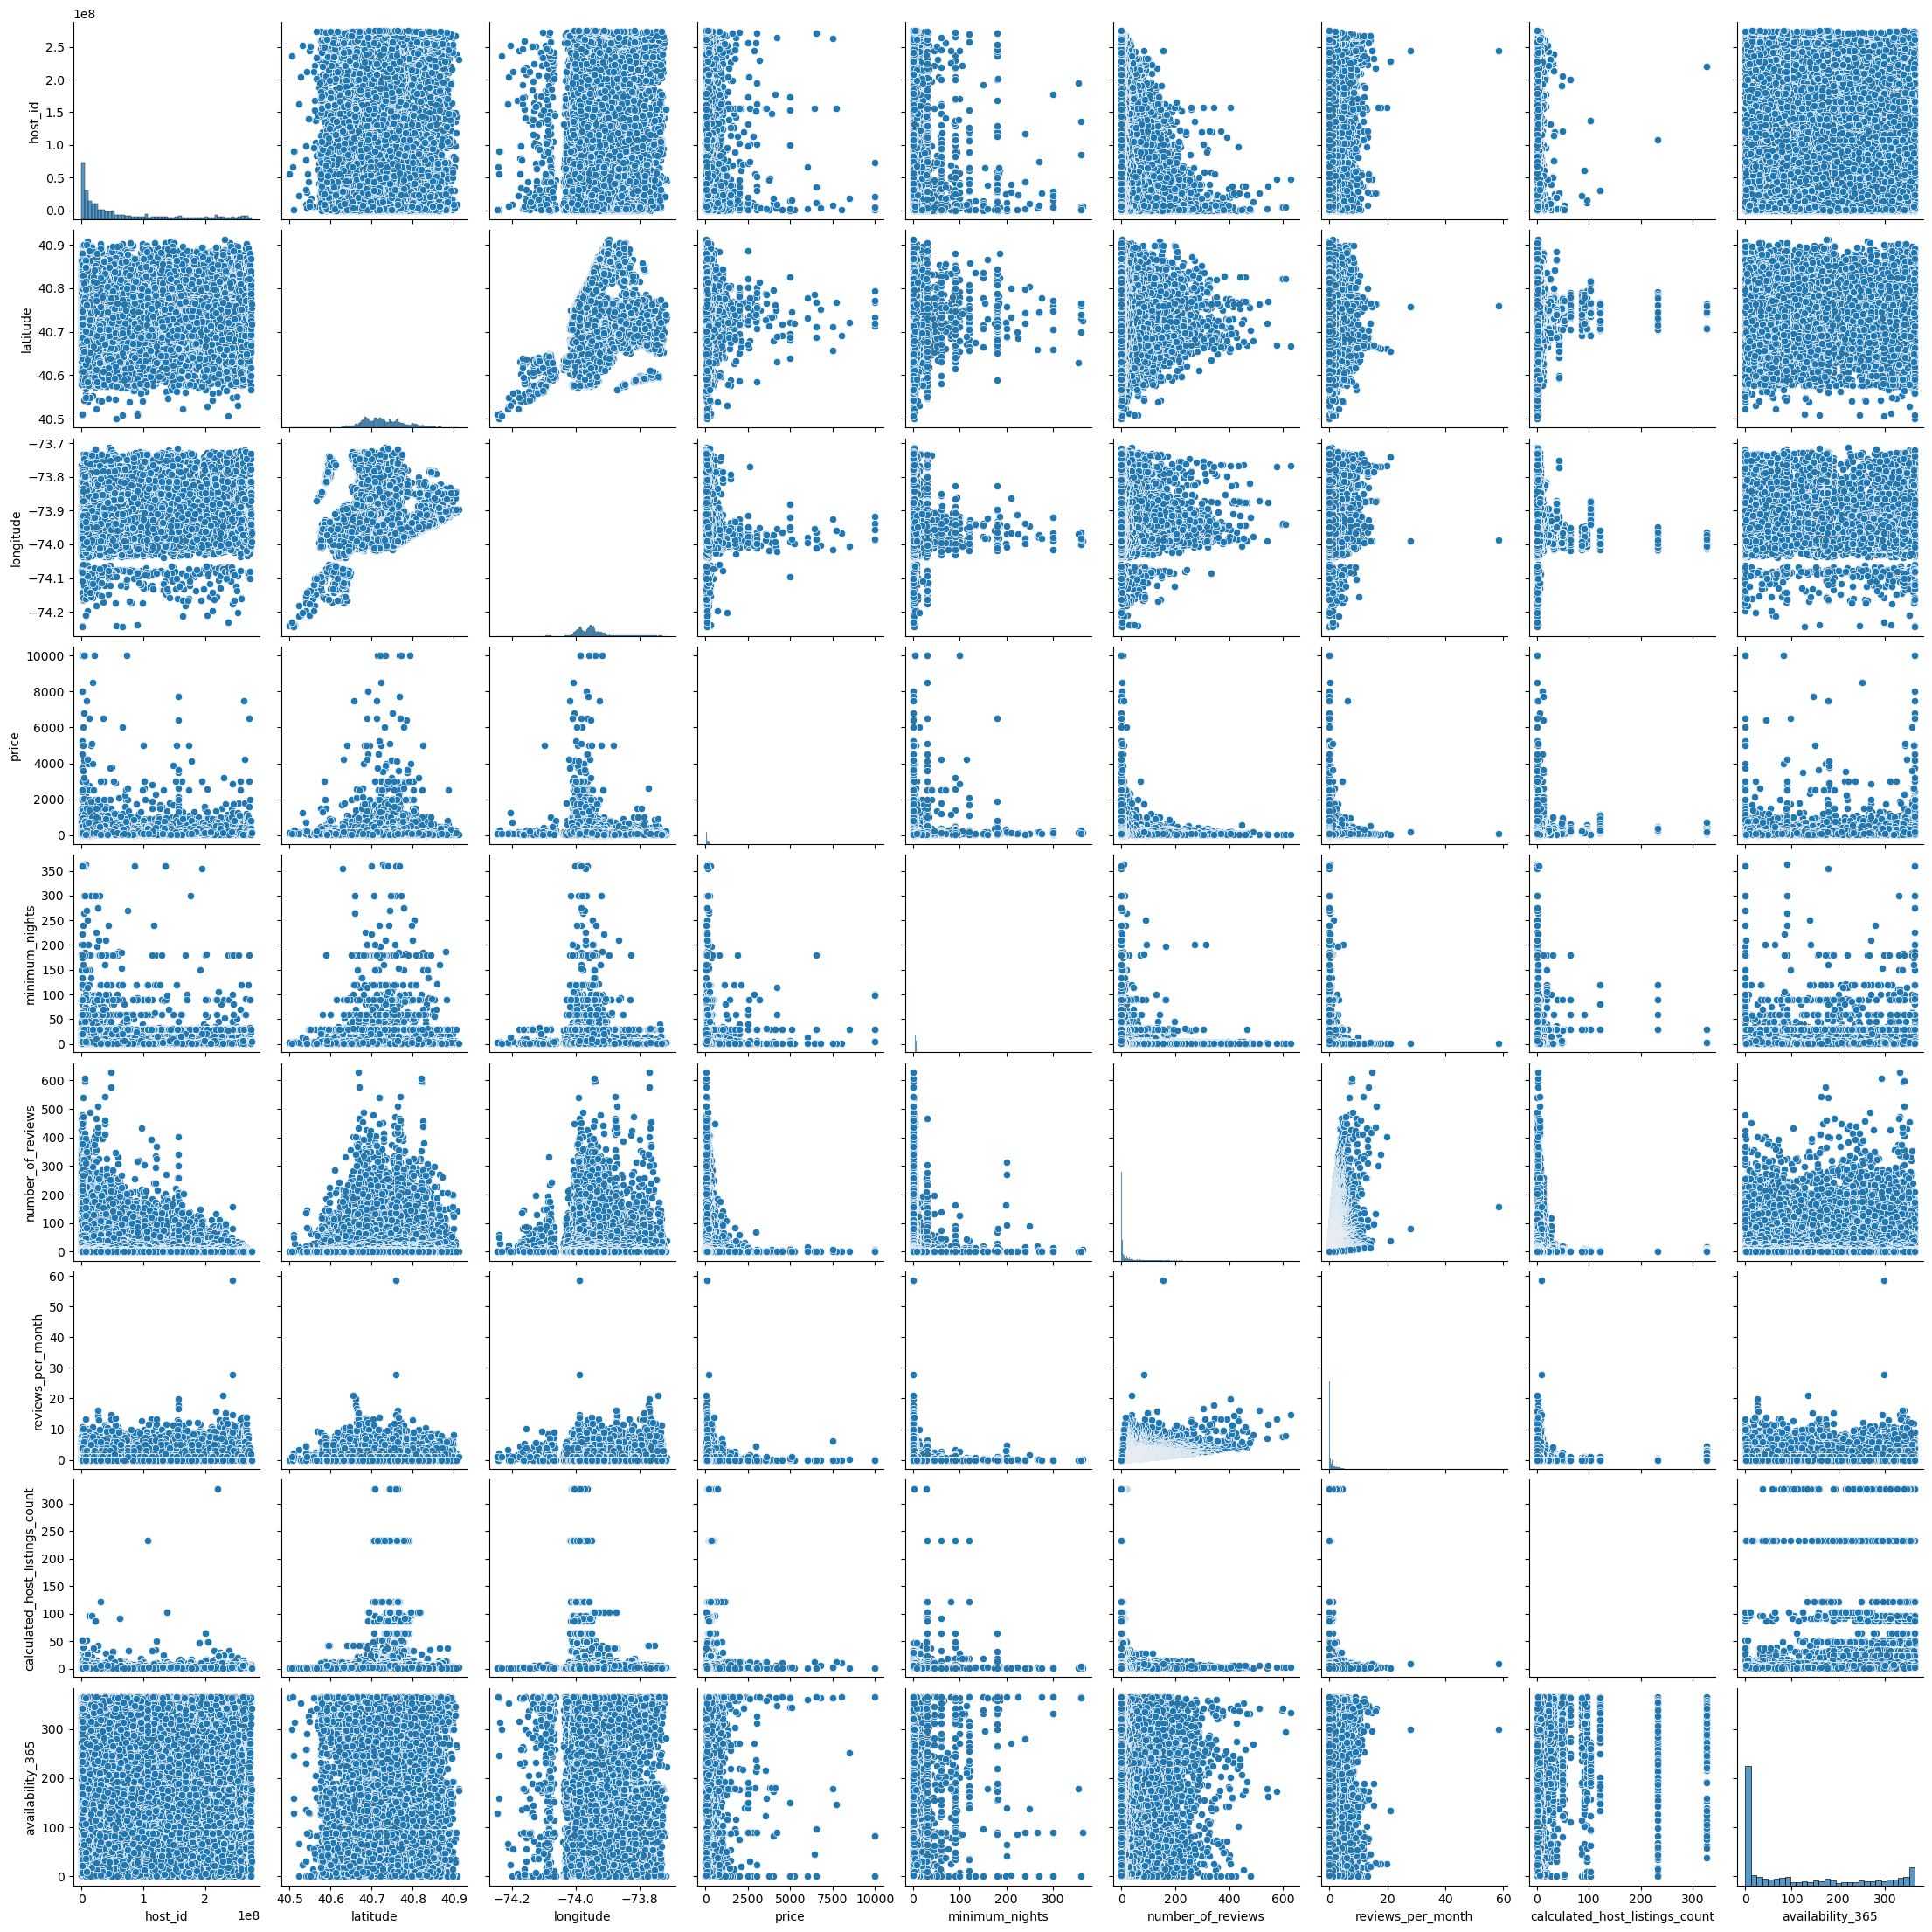

In [66]:
#creating pair plot
pair_plot = sns.pairplot(df)
plt.show()

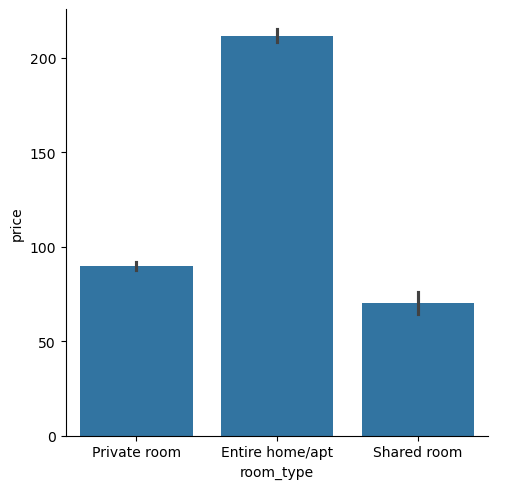

In [67]:
#creating catplot room type affect price
room_type_by_price = sns.catplot(data=df, x="room_type", y="price", kind="bar") 
plt.show()

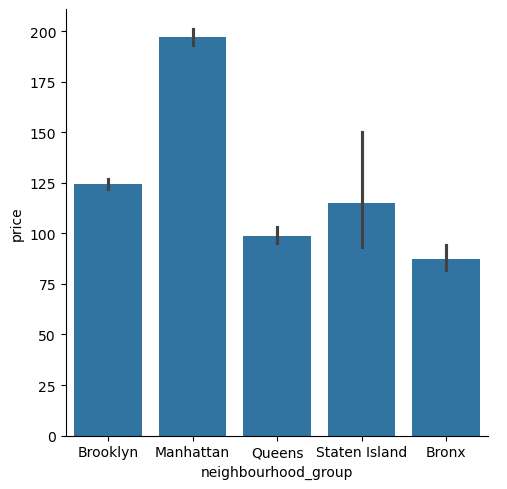

In [68]:
#creating catplot Scatterplot of availability_365 vs. price: To examine if higher availability affects pricing.
availability_365_vs_price = sns.catplot(data=df, x="neighbourhood_group", y="price", kind="bar")
plt.show()

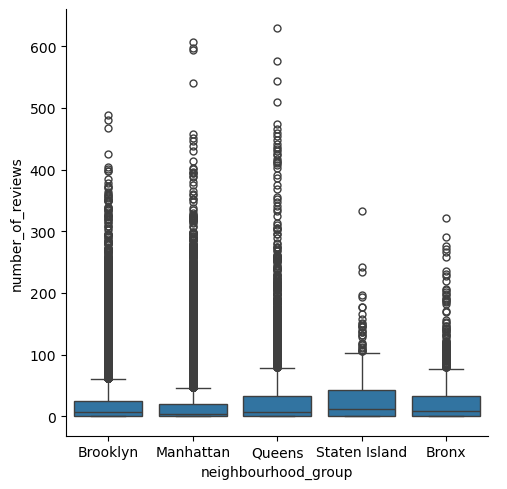

In [69]:
#creating catplot neighborhood_group vs. number of reviews:
neighborhood_group_vs_number_of_reviews = sns.catplot(data=df, x="neighbourhood_group", y="number_of_reviews", kind="box")
plt.show()

In [71]:
#Export visualizations
path= r'C:\Users\anika\New York Airbnb'

Price_vs_availability.figure.savefig(os.path.join(path, 'Visualizations', 'Price_vs_availability.png'))
Number_of_reviews_vs_availability.figure.savefig(os.path.join(path, 'Visualizations', 'Number_of_reviews_vs_availability.png'))
price_vs_number_of_reviews.figure.savefig(os.path.join(path, 'Visualizations', 'price_vs_number_of_reviews.png'))
number_of_reviews_vs_monthly_reviews.figure.savefig(os.path.join(path, 'Visualizations', 'number_of_reviews_vs_monthly_reviews.png'))
pair_plot.figure.savefig(os.path.join(path, 'Visualizations', 'pair_plot.png'))
room_type_by_price.figure.savefig(os.path.join(path, 'Visualizations', 'room_type_by_price.png'))
availability_365_vs_price.figure.savefig(os.path.join(path, 'Visualizations', 'availability_365_vs_price.png'))
neighborhood_group_vs_number_of_reviews.figure.savefig(os.path.join(path, 'Visualizations', 'neighborhood_group_vs_number_of_reviews.png'))
heat_map.figure.savefig(os.path.join(path, 'Visualizations', 'heat_map.png'))


In [72]:
#Export Dataset
path= r'C:\Users\anika\New York Airbnb\Data\Prepared Data'
df.to_csv(os.path.join(path, 'Task 6.2.csv'))